# Exploratory Data Analysis of NFL Quarter Backs: Peyton Manninng v/s Tom Brady 

In [1]:
import pandas as pd
import seaborn as sns
import re
import os
import numpy as np
import matplotlib.pyplot as plt

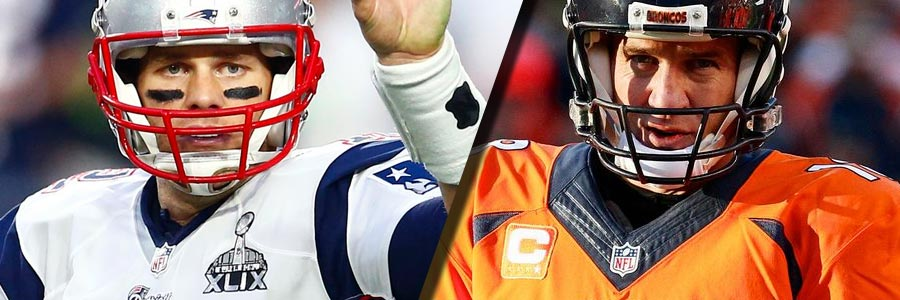

In [2]:
from IPython.display import Image
Image(filename='tm4.jpg')

In [3]:
def brady_manning(year1, year2):


    for i in range(year1,year2):
        yr_col = []
    # For Tom Brady vs Peyton Manning
    # As we are comparing 2 players i.e. length of QB list 
    # we have
        QBs = ['PeytonManning','TomBrady']
        
        yrs = str(i)
        file_name = yrs + '_NFL_Passing.csv'
        dataframe = pd.read_csv(file_name)
        dataframe.fillna(0, inplace=True)
            
        PlayerNames = []
    
        for pl in dataframe['Player']:
            pl = re.sub('[^A-Za-z0-9]+','',pl)
            PlayerNames.append(pl)
    
        dataframe['Player_Name'] = PlayerNames
        dataframe = dataframe.drop(dataframe.columns[0], axis=1)
        
        final_dataframe = dataframe[dataframe['Player_Name'].isin(QBs)]
    
        final_dataframe.reset_index(drop=True, inplace=True)
        rows_num = final_dataframe.shape[0]
    
        for j in range(rows_num):
            yr_col.append(i)
        
        final_dataframe['Yr'] = yr_col
        final_df = final_dataframe
        
        if i == year1:
            rivalry = final_df
        else:
            rivalry = rivalry.append(final_df)

     
    return rivalry
    

In [4]:
tb_pm = brady_manning(2001, 2011)

D:\ANA\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
tb_pm

,Tm,Pos,Cmp,Att,Yds,TD,Int,Lng,Sk,Yds.1,4QC,GWD,Player_Name,Yr
0,IND,QB,343,547,4131,26,23,86,29,232,0,0,PeytonManning,2001
1,NWE,QB,264,413,2843,18,12,91,41,216,3,3,TomBrady,2001
0,NWE,QB,373,601,3764,28,14,49,31,190,2,3,TomBrady,2002
1,IND,QB,392,591,4200,27,19,69,23,145,4,5,PeytonManning,2002
0,IND,QB,379,566,4267,29,10,79,18,107,3,4,PeytonManning,2003
1,NWE,QB,317,527,3620,23,12,82,32,219,3,5,TomBrady,2003
0,IND,QB,336,497,4557,49,10,80,13,101,2,4,PeytonManning,2004
1,NWE,QB,288,474,3692,28,14,50,26,162,0,1,TomBrady,2004
0,NWE,QB,334,530,4110,26,14,71,26,188,3,4,TomBrady,2005
1,IND,QB,305,453,3747,28,10,80,17,81,1,1,PeytonManning,2005


In [6]:
legacy = tb_pm.groupby('Player_Name')

In [7]:
Tom_Brady = legacy.get_group('TomBrady')

# 'Tom_Brady' is a dataframe that consists of the Passing Statistics of the New England Patriots QuarterBack, Tom Brady from the year 2001 to 2010

In [8]:
Tom_Brady.reset_index(inplace=True)

In [9]:
Tom_Brady

,index,Tm,Pos,Cmp,Att,Yds,TD,Int,Lng,Sk,Yds.1,4QC,GWD,Player_Name,Yr
0,1,NWE,QB,264,413,2843,18,12,91,41,216,3,3,TomBrady,2001
1,0,NWE,QB,373,601,3764,28,14,49,31,190,2,3,TomBrady,2002
2,1,NWE,QB,317,527,3620,23,12,82,32,219,3,5,TomBrady,2003
3,1,NWE,QB,288,474,3692,28,14,50,26,162,0,1,TomBrady,2004
4,0,NWE,QB,334,530,4110,26,14,71,26,188,3,4,TomBrady,2005
5,1,NWE,QB,319,516,3529,24,12,62,26,175,2,2,TomBrady,2006
6,0,NWE,QB,398,578,4806,50,8,69,21,128,4,4,TomBrady,2007
7,1,NWE,0,7,11,76,0,0,26,0,0,0,0,TomBrady,2008
8,1,NWE,QB,371,565,4398,28,13,81,16,86,1,1,TomBrady,2009
9,1,NWE,QB,324,492,3900,36,4,79,25,175,2,3,TomBrady,2010


In [10]:
Tom_Brady.columns

Index(['index', 'Tm', 'Pos', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Lng', 'Sk',
       'Yds.1', '4QC', 'GWD', 'Player_Name', 'Yr'],
      dtype='object')

In [11]:
Tom_Brady.dtypes

index           int64
Tm             object
Pos            object
Cmp            object
Att            object
Yds            object
TD             object
Int            object
Lng            object
Sk             object
Yds.1          object
4QC            object
GWD            object
Player_Name    object
Yr              int64
dtype: object

# 'tt' is a dataframe that consists of all the columns in the 'Tom_Brady' dataframe that have datatype 'object' but should have been int

In [12]:
tt = Tom_Brady[['Cmp', 'Att', 'Yds', 'TD', 'Int', 'Lng', 'Sk', 'Yds.1', '4QC', 'GWD']]

In [13]:
for i in tt.columns:
    Tom_Brady[i] = Tom_Brady[i].astype(int)
    print(Tom_Brady[i].dtype)

int32
int32
int32
int32
int32
int32
int32
int32
int32
int32


D:\ANA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
Tom_Brady.dtypes

index           int64
Tm             object
Pos            object
Cmp             int32
Att             int32
Yds             int32
TD              int32
Int             int32
Lng             int32
Sk              int32
Yds.1           int32
4QC             int32
GWD             int32
Player_Name    object
Yr              int64
dtype: object

# Selecting the columns of the 'Tom_Brady' dataframe that are 'integer' datatype and 'object' datatype respectively

In [15]:
Tom_Brady.select_dtypes(include=['number'])

,index,Cmp,Att,Yds,TD,Int,Lng,Sk,Yds.1,4QC,GWD,Yr
0,1,264,413,2843,18,12,91,41,216,3,3,2001
1,0,373,601,3764,28,14,49,31,190,2,3,2002
2,1,317,527,3620,23,12,82,32,219,3,5,2003
3,1,288,474,3692,28,14,50,26,162,0,1,2004
4,0,334,530,4110,26,14,71,26,188,3,4,2005
5,1,319,516,3529,24,12,62,26,175,2,2,2006
6,0,398,578,4806,50,8,69,21,128,4,4,2007
7,1,7,11,76,0,0,26,0,0,0,0,2008
8,1,371,565,4398,28,13,81,16,86,1,1,2009
9,1,324,492,3900,36,4,79,25,175,2,3,2010


In [16]:
Tom_Brady.select_dtypes(include=['object'])

,Tm,Pos,Player_Name
0,NWE,QB,TomBrady
1,NWE,QB,TomBrady
2,NWE,QB,TomBrady
3,NWE,QB,TomBrady
4,NWE,QB,TomBrady
5,NWE,QB,TomBrady
6,NWE,QB,TomBrady
7,NWE,0,TomBrady
8,NWE,QB,TomBrady
9,NWE,QB,TomBrady


In [17]:
Peyton_Manning = legacy.get_group('PeytonManning')

In [18]:
Peyton_Manning.reset_index(inplace=True)

In [19]:
Peyton_Manning

,index,Tm,Pos,Cmp,Att,Yds,TD,Int,Lng,Sk,Yds.1,4QC,GWD,Player_Name,Yr
0,0,IND,QB,343,547,4131,26,23,86,29,232,0,0,PeytonManning,2001
1,1,IND,QB,392,591,4200,27,19,69,23,145,4,5,PeytonManning,2002
2,0,IND,QB,379,566,4267,29,10,79,18,107,3,4,PeytonManning,2003
3,0,IND,QB,336,497,4557,49,10,80,13,101,2,4,PeytonManning,2004
4,1,IND,QB,305,453,3747,28,10,80,17,81,1,1,PeytonManning,2005
5,0,IND,QB,362,557,4397,31,9,68,14,86,3,3,PeytonManning,2006
6,1,IND,QB,337,515,4040,31,14,73,21,124,1,2,PeytonManning,2007
7,0,IND,QB,371,555,4002,27,12,75,14,86,4,6,PeytonManning,2008
8,0,IND,QB,393,571,4500,33,16,80,10,74,7,7,PeytonManning,2009
9,0,IND,QB,450,679,4700,33,17,73,16,91,0,2,PeytonManning,2010


In [20]:
pm = Peyton_Manning[['Cmp', 'Att', 'Yds', 'TD', 'Int', 'Lng', 'Sk', 'Yds.1', '4QC', 'GWD']]

In [21]:
for i in pm.columns:
    Peyton_Manning[i] = Peyton_Manning[i].astype(int)
    print(Peyton_Manning[i].dtype)

int32
int32
int32
int32
int32
int32
int32
int32
int32
int32


D:\ANA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
Peyton_Manning.select_dtypes(include=['number'])

,index,Cmp,Att,Yds,TD,Int,Lng,Sk,Yds.1,4QC,GWD,Yr
0,0,343,547,4131,26,23,86,29,232,0,0,2001
1,1,392,591,4200,27,19,69,23,145,4,5,2002
2,0,379,566,4267,29,10,79,18,107,3,4,2003
3,0,336,497,4557,49,10,80,13,101,2,4,2004
4,1,305,453,3747,28,10,80,17,81,1,1,2005
5,0,362,557,4397,31,9,68,14,86,3,3,2006
6,1,337,515,4040,31,14,73,21,124,1,2,2007
7,0,371,555,4002,27,12,75,14,86,4,6,2008
8,0,393,571,4500,33,16,80,10,74,7,7,2009
9,0,450,679,4700,33,17,73,16,91,0,2,2010


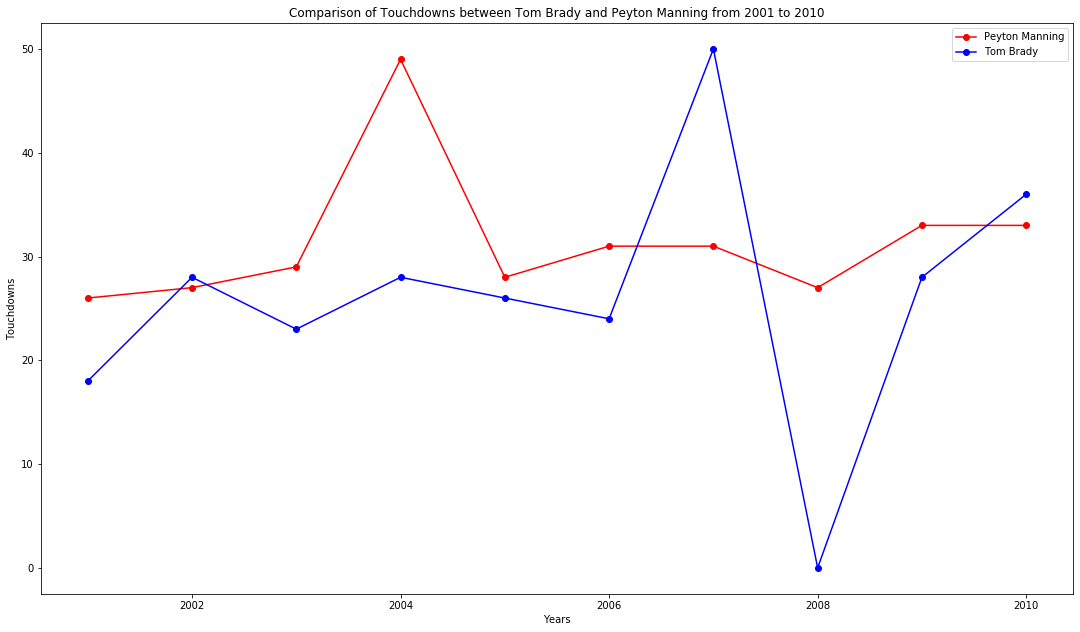

In [25]:
plt.plot(Peyton_Manning['Yr'], Peyton_Manning['TD'], "ro" ,linestyle = 'solid',label = "Peyton Manning")
plt.plot(Peyton_Manning['Yr'], Tom_Brady['TD'], "bo" ,linestyle = 'solid',label = "Tom Brady")
plt.xlabel('Years')
plt.ylabel('Touchdowns')
plt.title('Comparison of Touchdowns between Tom Brady and Peyton Manning from 2001 to 2010')
#plt.xticks(Peyton_Manning['Yr'])
plt.yticks()
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('tbpmtds.png', dpi=100)
plt.show()

In [26]:
data = {'Tom Brady':Tom_Brady['Cmp'],"Peyton Manning":Peyton_Manning['Cmp']}
animated_df = pd.DataFrame(data)

In [27]:
animated_df.dtypes

Tom Brady         int32
Peyton Manning    int32
dtype: object

In [28]:
animated_df['years'] = Tom_Brady['Yr']

In [29]:
animated_df

,Tom Brady,Peyton Manning,years
0,264,343,2001
1,373,392,2002
2,317,379,2003
3,288,336,2004
4,334,305,2005
5,319,362,2006
6,398,337,2007
7,7,371,2008
8,371,393,2009
9,324,450,2010


In [30]:
cum_sum_df = animated_df[['Tom Brady','Peyton Manning']].cumsum(axis=0)
cum_sum_df['years'] = animated_df['years']
cum_sum_df.set_index("years", inplace = True)

In [31]:
cum_sum_df

,Tom Brady,Peyton Manning
years,,
2001,264,343
2002,637,735
2003,954,1114
2004,1242,1450
2005,1576,1755
2006,1895,2117
2007,2293,2454
2008,2300,2825
2009,2671,3218


In [32]:
import bar_chart_race as bcr
bcr.bar_chart_race(df=cum_sum_df, filename = None, period_length = 1000, figsize = (6,6), title = 'Tom Brady v/s Peyton Manning Pass Completions from 2010-2019')

In [ ]:
# Matplotlib

In [33]:
Peyton_Manning.drop(['index','Tm','Player_Name'], axis=1, inplace=True)

D:\ANA\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
Tom_Brady.drop(['index','Tm','Player_Name'], axis=1, inplace=True)

In [35]:
Peyton_Manning.head(3)

,Pos,Cmp,Att,Yds,TD,Int,Lng,Sk,Yds.1,4QC,GWD,Yr
0,QB,343,547,4131,26,23,86,29,232,0,0,2001
1,QB,392,591,4200,27,19,69,23,145,4,5,2002
2,QB,379,566,4267,29,10,79,18,107,3,4,2003


In [36]:
Tom_Brady.head(3)

,Pos,Cmp,Att,Yds,TD,Int,Lng,Sk,Yds.1,4QC,GWD,Yr
0,QB,264,413,2843,18,12,91,41,216,3,3,2001
1,QB,373,601,3764,28,14,49,31,190,2,3,2002
2,QB,317,527,3620,23,12,82,32,219,3,5,2003


# Matplotlib

# Tom Brady v/s Peyton Manning Completions Comparisons from 2010-2019

Text(0.5, 1, 'Tom Brady v/s Peyton Manning Completions Comparisons from 2010-2019')

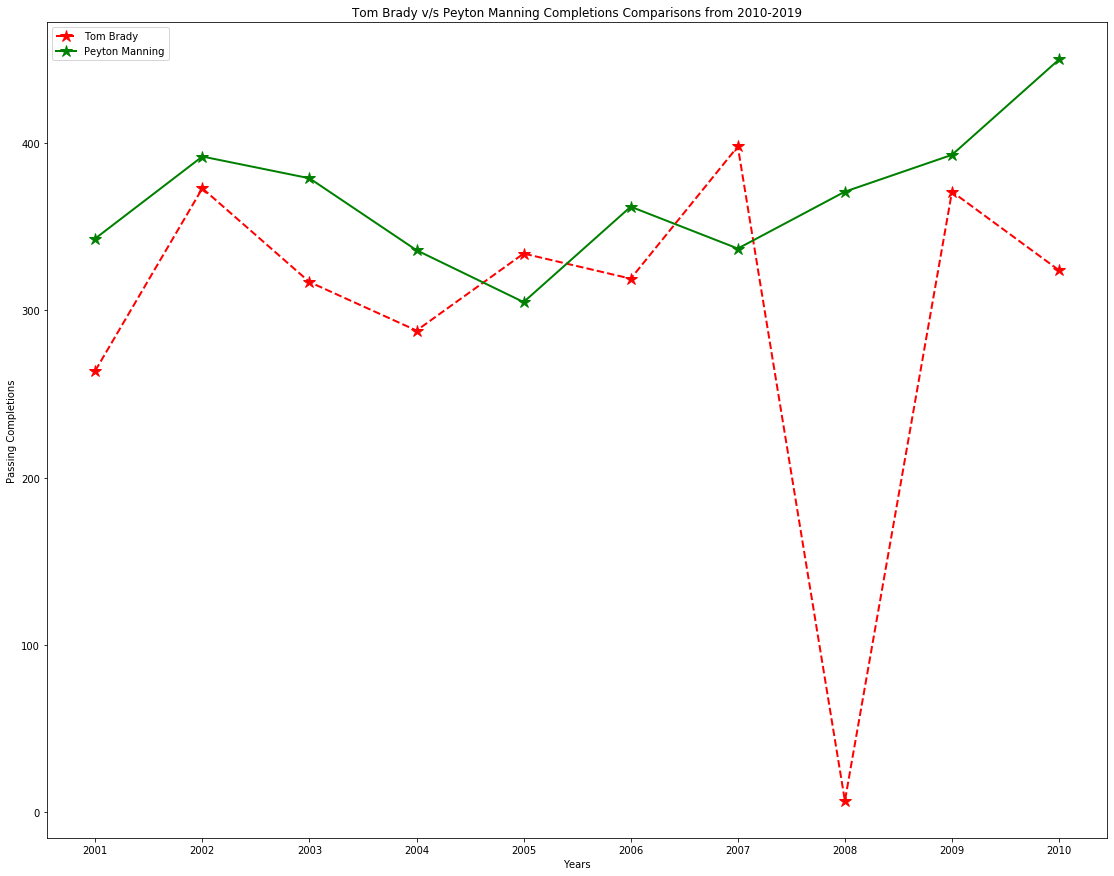

In [38]:
plt.plot(Tom_Brady['Yr'], Tom_Brady['Cmp'], 'r*--', linestyle='dashed', linewidth=2, markersize=12, label = 'Tom Brady')
plt.plot(Peyton_Manning['Yr'], Peyton_Manning['Cmp'],'g*--', linestyle='solid', linewidth=2, markersize=12, label = 'Peyton Manning')
plt.xlabel('Years')
plt.ylabel('Passing Completions')
plt.legend(loc="upper left")
plt.xticks(Tom_Brady['Yr'])
fig = plt.gcf()
fig.set_size_inches(19, 15)
plt.savefig('tbpmcmps.png', dpi=100)
plt.title("Tom Brady v/s Peyton Manning Completions Comparisons from 2010-2019")

# Tom Brady v/s Peyton Manning Yards Comparisons from 2010-2019

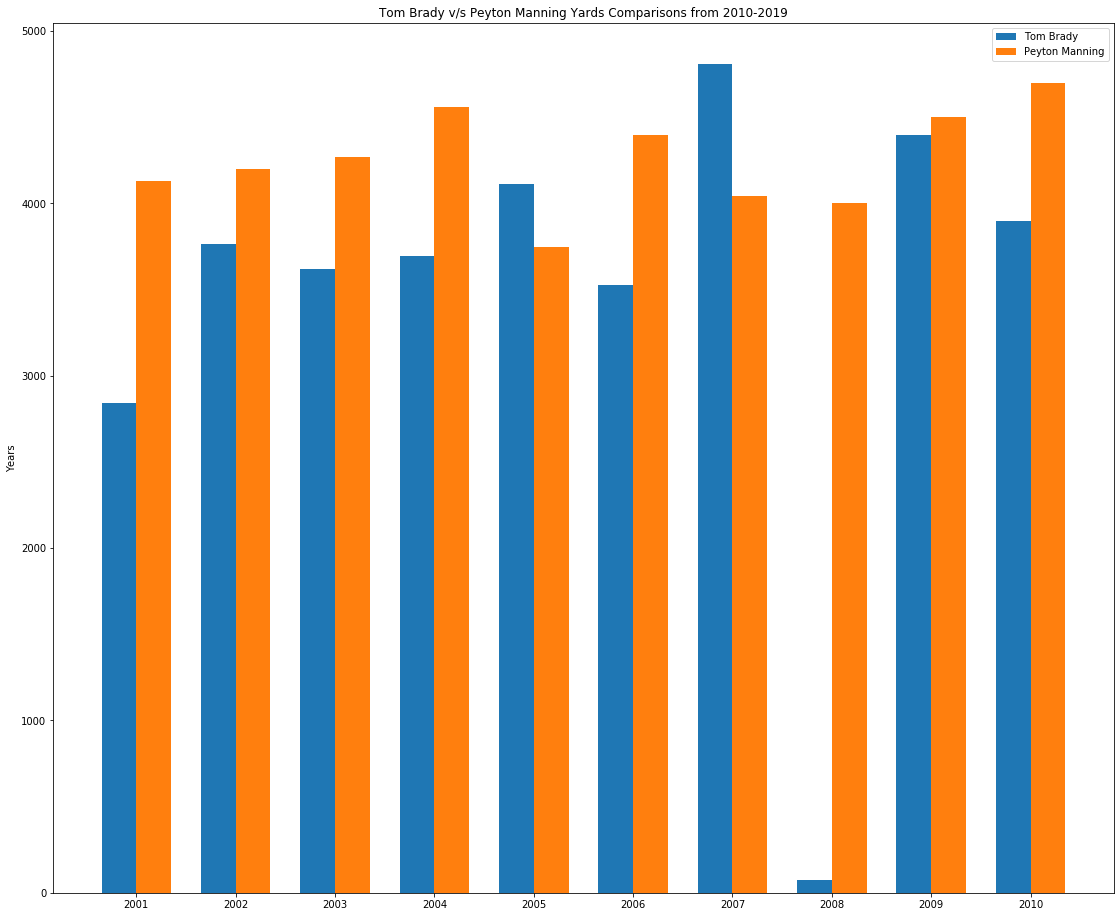

In [40]:
labels = Tom_Brady['Yr']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Tom_Brady['Yds'], width, label='Tom Brady')
rects2 = ax.bar(x + width/2, Peyton_Manning['Yds'], width, label='Peyton Manning')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Years')
ax.set_title('Tom Brady v/s Peyton Manning Yards Comparisons from 2010-2019')
ax.set_xticks(x)
fig = plt.gcf()
fig.set_size_inches(19, 16)
plt.savefig('tbpmyds.png', dpi=100)
ax.set_xticklabels(labels)
ax.legend()
plt.show()